In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.naive_bayes import GaussianNB
data = pd.read_csv('./data.csv')
data.head(10)

,Measure,Country,Citizenship,Year,Value
0,Arrivals,Oceania,New Zealand Citizen,1979,11817.0
1,Arrivals,Oceania,Australian Citizen,1979,4436.0
2,Arrivals,Oceania,Total All Citizenships,1979,19965.0
3,Arrivals,Antarctica,New Zealand Citizen,1979,10.0
4,Arrivals,Antarctica,Australian Citizen,1979,0.0
5,Arrivals,Antarctica,Total All Citizenships,1979,13.0
6,Arrivals,American Samoa,New Zealand Citizen,1979,17.0
7,Arrivals,American Samoa,Australian Citizen,1979,4.0
8,Arrivals,American Samoa,Total All Citizenships,1979,30.0
9,Arrivals,Australia,New Zealand Citizen,1979,8224.0


In [2]:
data['Measure'].unique()

array(['Arrivals', 'Departures', 'Net'], dtype=object)

In [3]:
data['Measure'].replace("Arrivals",0,inplace=True)
data['Measure'].replace("Departures",1,inplace=True)
data['Measure'].replace("Net",2,inplace=True)
data.head()

,Measure,Country,Citizenship,Year,Value
0,0,Oceania,New Zealand Citizen,1979,11817.0
1,0,Oceania,Australian Citizen,1979,4436.0
2,0,Oceania,Total All Citizenships,1979,19965.0
3,0,Antarctica,New Zealand Citizen,1979,10.0
4,0,Antarctica,Australian Citizen,1979,0.0


In [4]:
data['CountryID'] = pd.factorize(data.Country)[0]
data['CitID'] = pd.factorize(data.Citizenship)[0]
data.head()

,Measure,Country,Citizenship,Year,Value,CountryID,CitID
0,0,Oceania,New Zealand Citizen,1979,11817.0,0,0
1,0,Oceania,Australian Citizen,1979,4436.0,0,1
2,0,Oceania,Total All Citizenships,1979,19965.0,0,2
3,0,Antarctica,New Zealand Citizen,1979,10.0,1,0
4,0,Antarctica,Australian Citizen,1979,0.0,1,1


In [5]:
data.isnull().sum()

Measure         0
Country         0
Citizenship     0
Year            0
Value          72
CountryID       0
CitID           0
dtype: int64

In [6]:
data["Value"].fillna(data["Value"].median(),inplace=True)

In [7]:
data.drop("Country", axis=1, inplace=True)
data.drop('Citizenship', axis=1, inplace=True)
X= data[['CountryID','Measure','Year','CitID']].values
Y= data['Value'].values
X_train, X_test, y_train, y_test = train_test_split(
  X, Y, test_size=0.3, random_state=9)

In [8]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=70,max_features = 3,max_depth=5,n_jobs=-1)
rf.fit(X_train ,y_train)
rf.score(X_test, y_test)

0.7401159320532291

In [9]:

grouped = data.groupby(['Year']).aggregate({'Value' : 'sum'})

In [10]:
grouped.head()

,Value
Year,
1979,396132.0
1980,440970.0
1981,435476.0
1982,439674.0
1983,417516.0


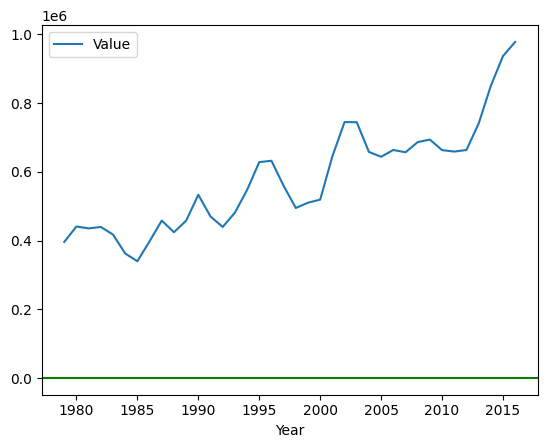

In [11]:
#Growth of migration to USA by year
grouped.plot(kind='line');plt.axhline(169, color='g')
plt.show()